# Dataset Information

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.


# Import Modules

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the dataset

In [ ]:
# ei dataset download kore nite hobe

In [9]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# statistical info
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Preprocessing the dataset

In [12]:
# check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

__Exploratory Data Analysis__

<Axes: ylabel='count'>

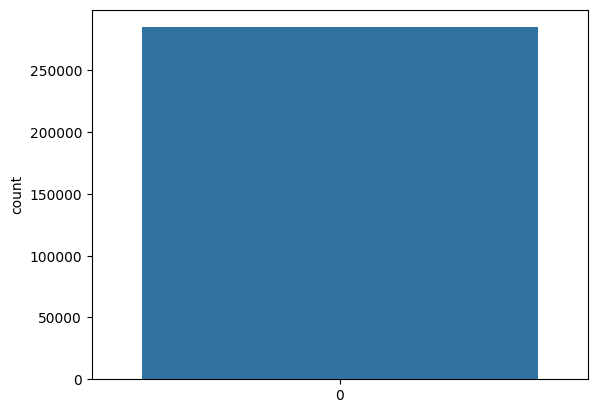

In [13]:
sns.countplot(df['Class'])

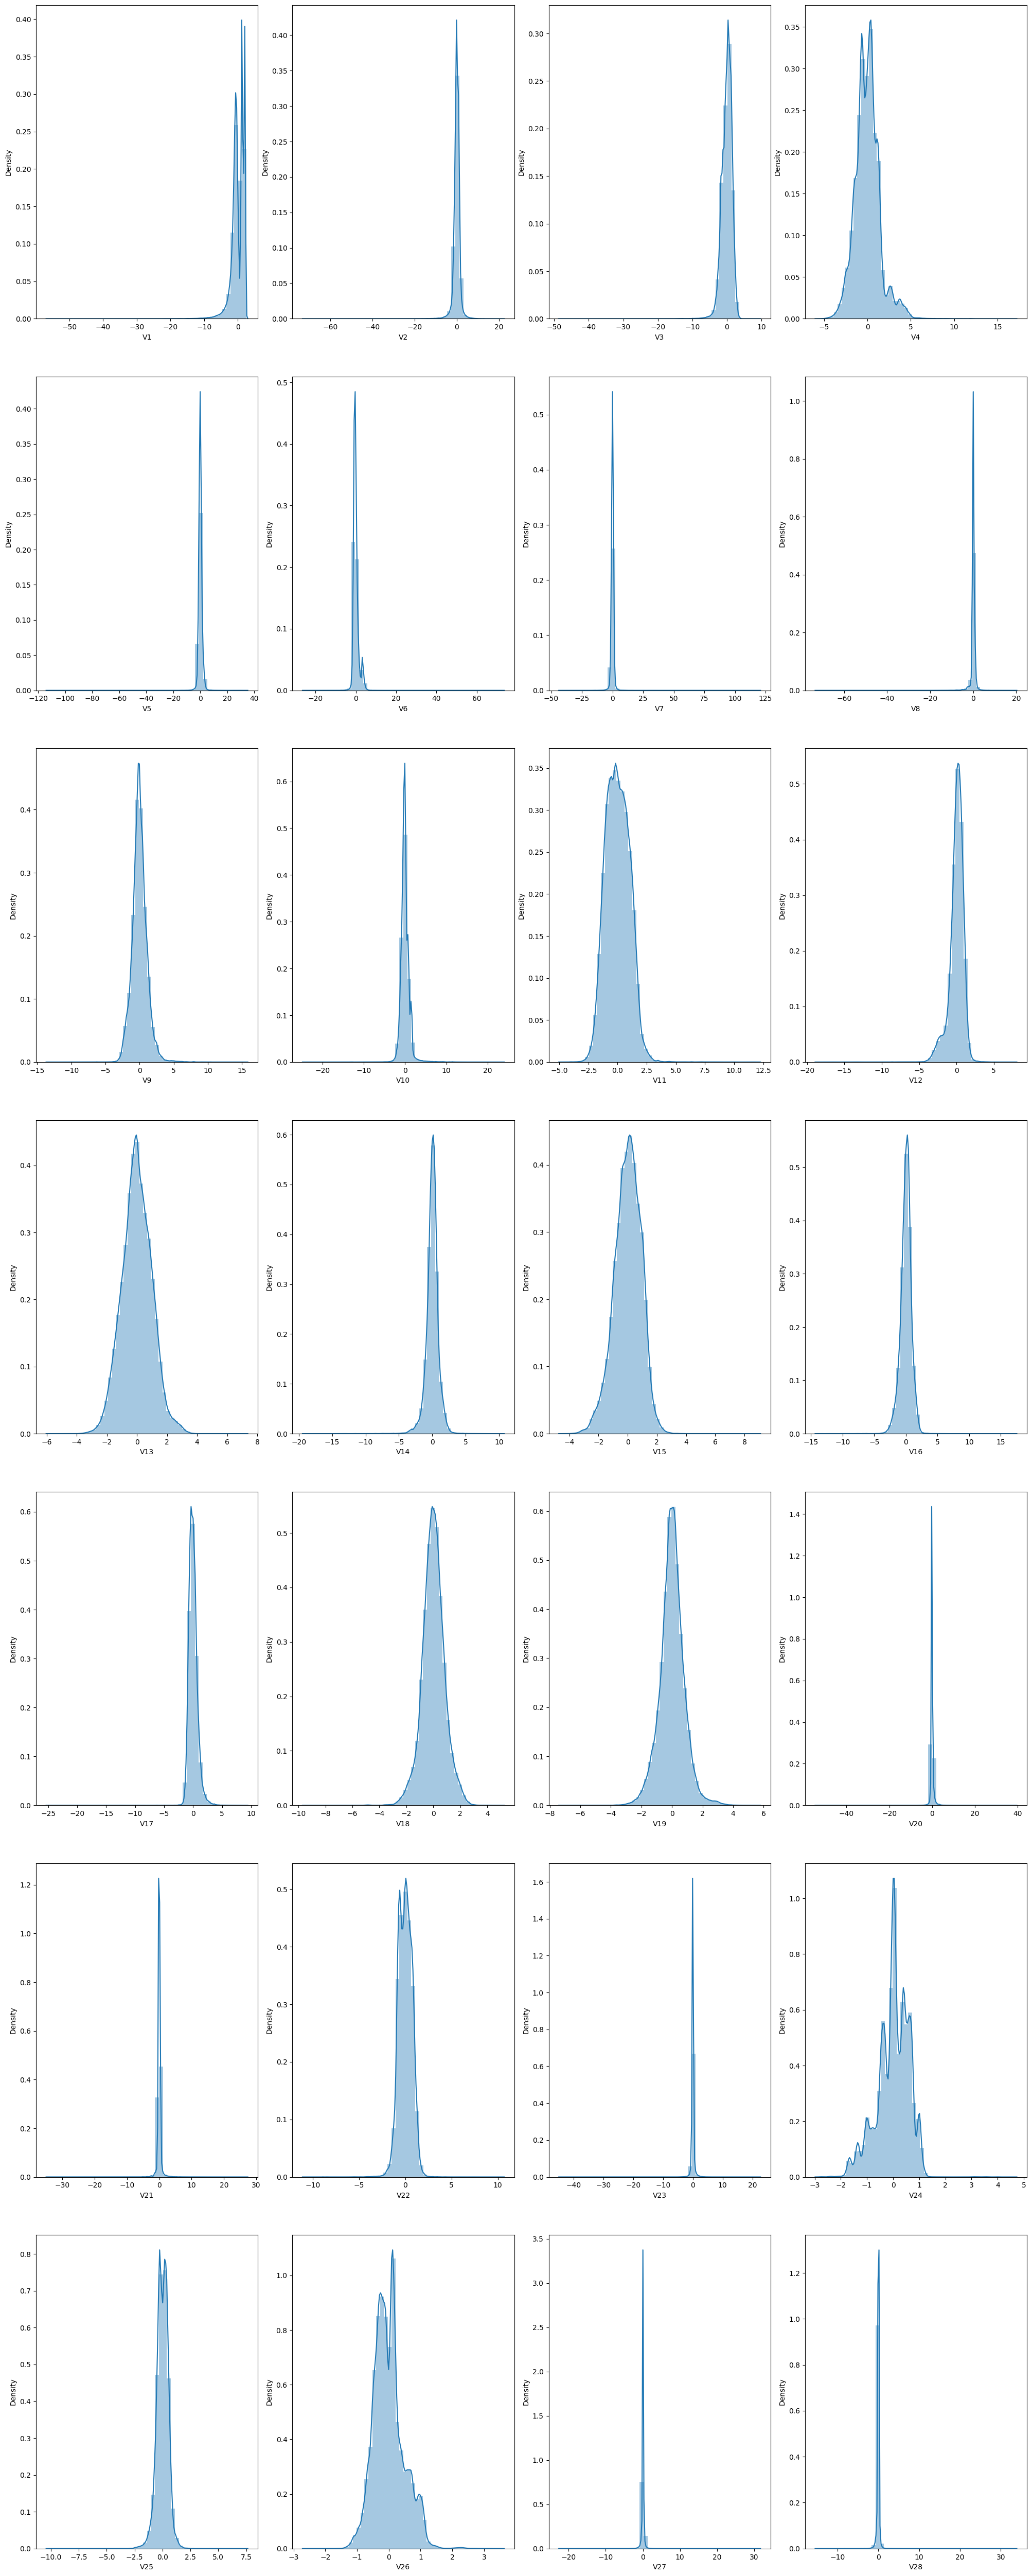

In [21]:
df_temp = df.drop(columns=['Time','Amount','Class'],axis=1)

# creating dist plots
fig,ax = plt.subplots(ncols=4,nrows=7,figsize=(20,50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col],ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=5)

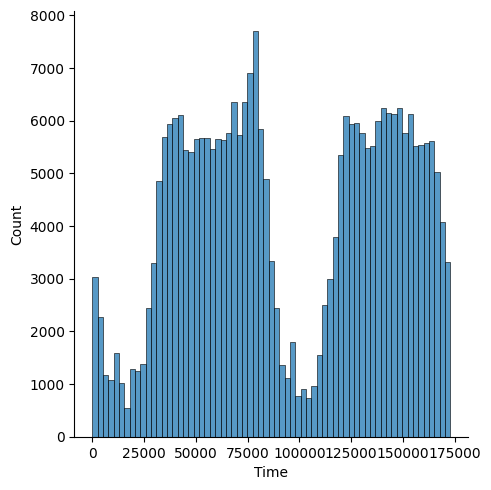

In [22]:
sns.displot(df['Time'])

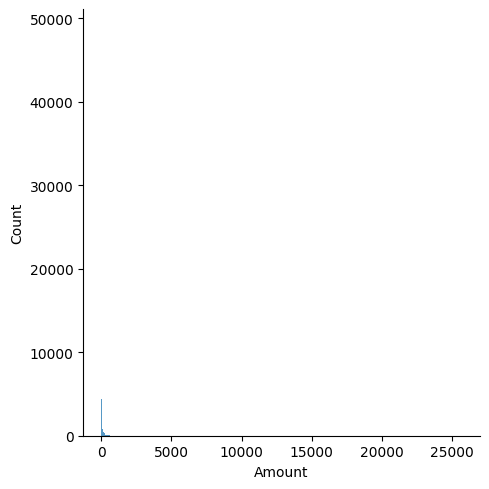

In [23]:
sns.displot(df['Amount'])

# Coorelation Matrix

<Axes: >

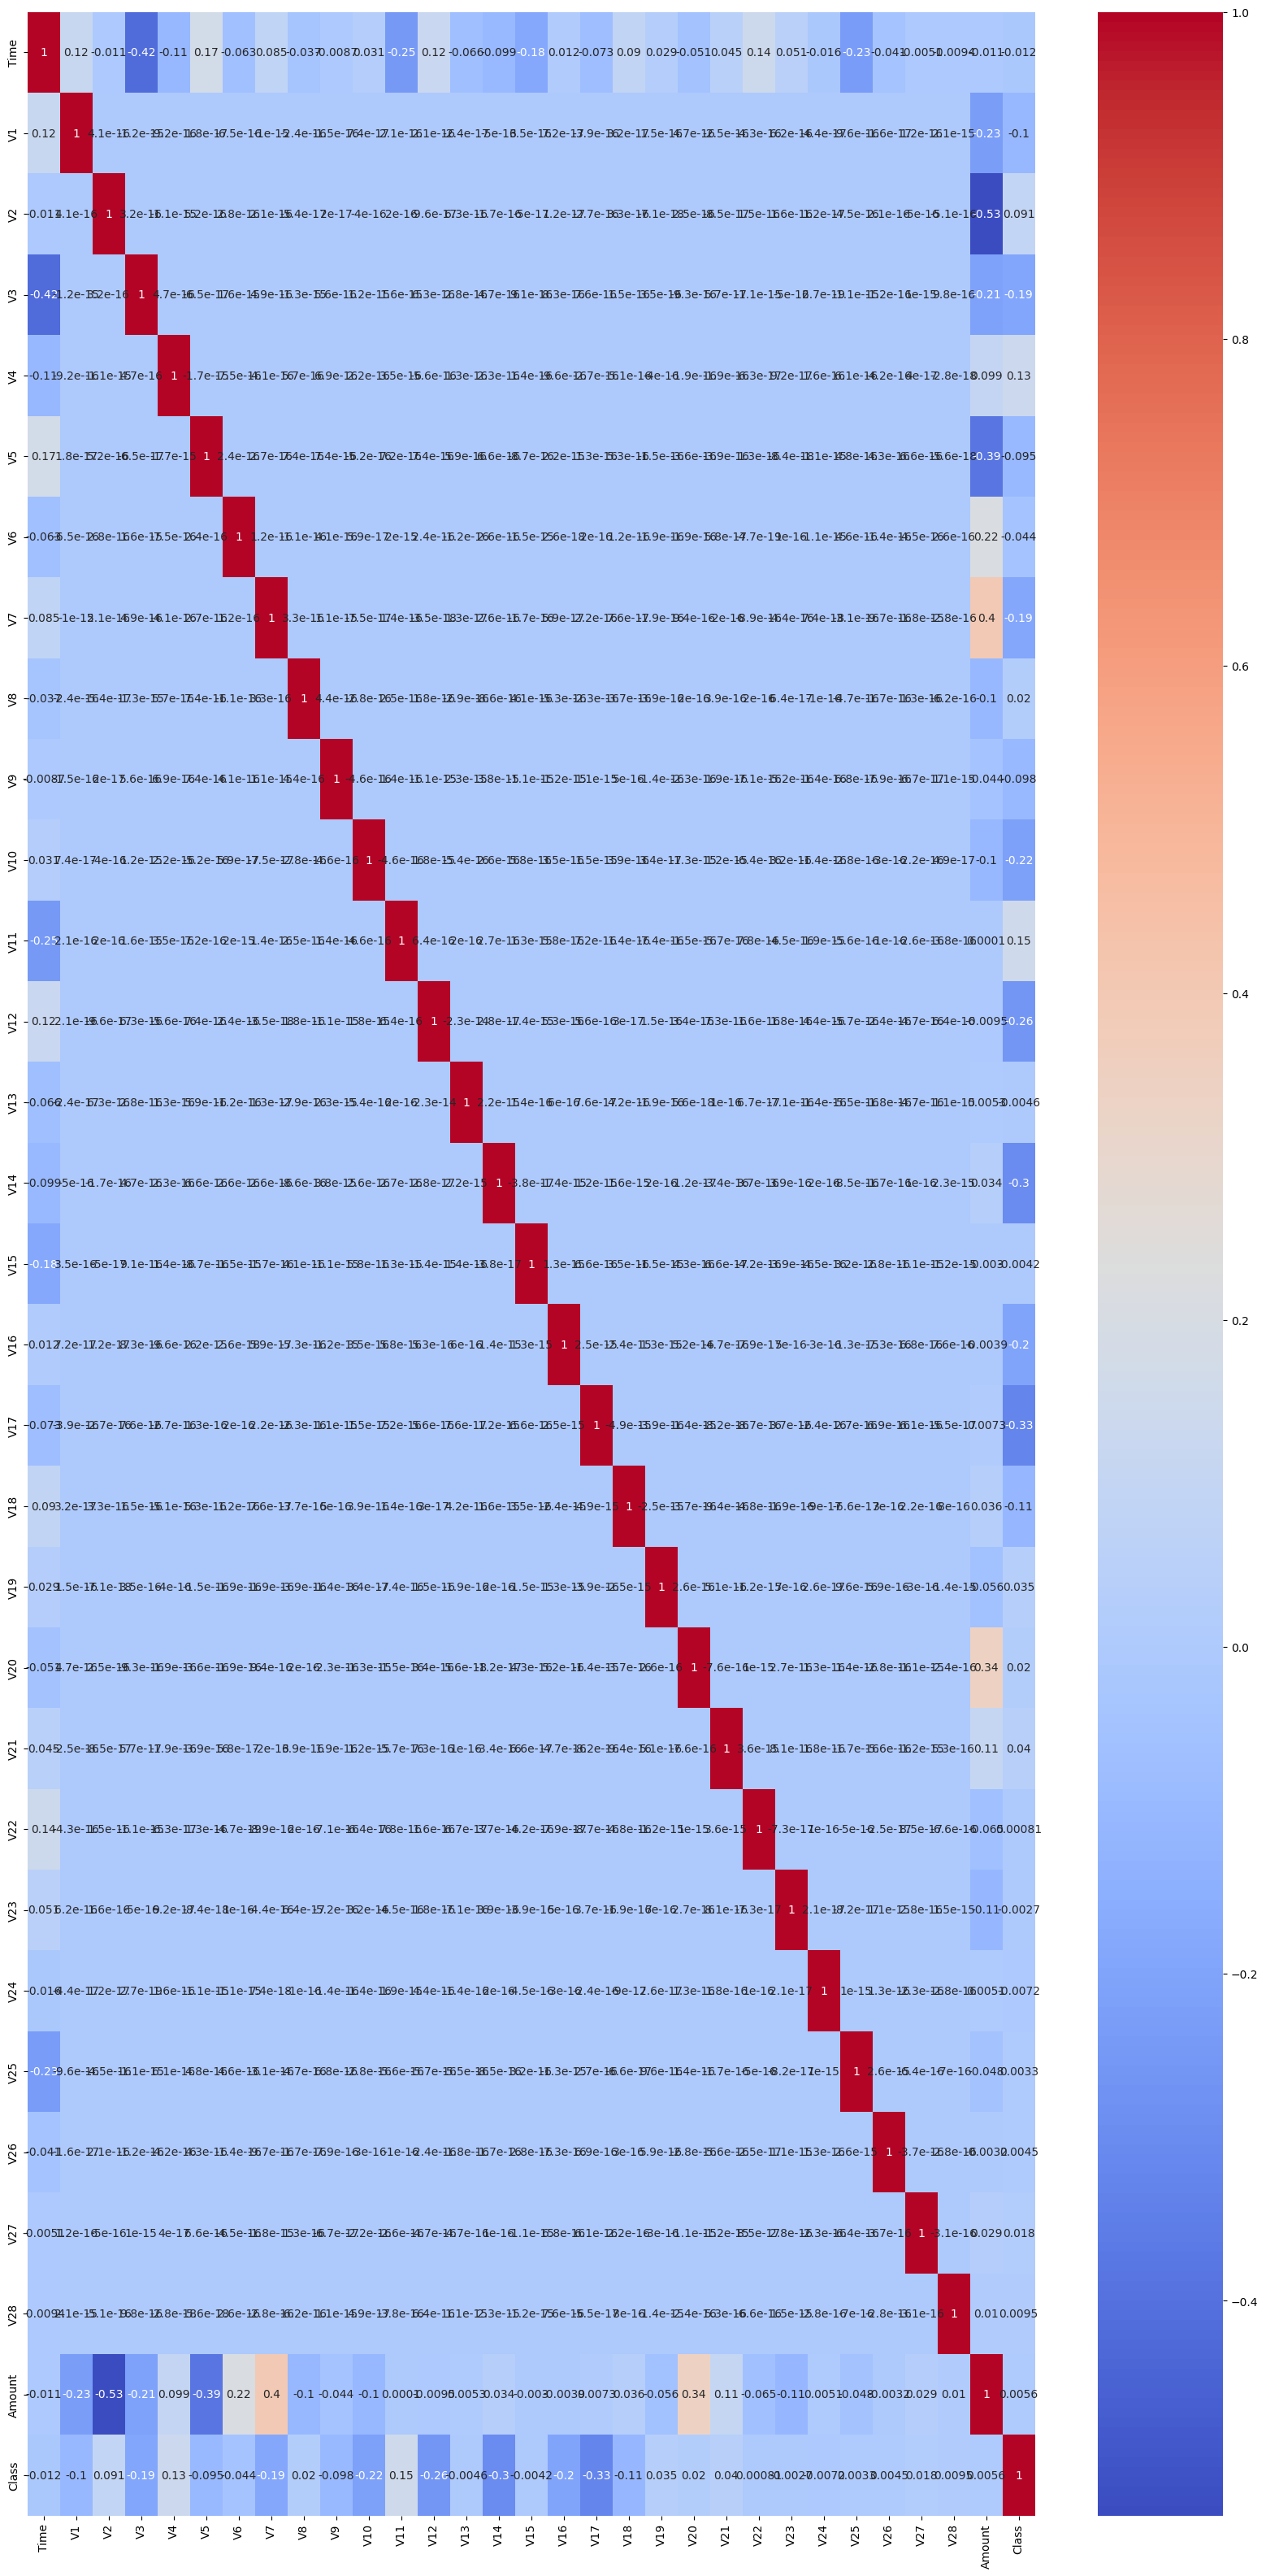

In [24]:
corr = df.corr()
plt.figure(figsize=(20,40))
sns.heatmap(corr,annot=True,cmap='coolwarm')

# Input Split

In [26]:
x = df.drop(columns=['Class'],axis=1)
y = df['Class']

# Standard Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_scaler = sc.fit_transform(x)

In [29]:
x_scaler

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [30]:
x_scaler[-1]

array([ 1.64205773, -0.27233093, -0.11489898,  0.46386564, -0.35757   ,
       -0.00908946, -0.48760183,  1.27476937, -0.3471764 ,  0.44253246,
       -0.84072963, -1.01934641, -0.0315383 , -0.18898634, -0.08795849,
        0.04515766, -0.34535763, -0.77752147,  0.1997554 , -0.31462479,
        0.49673933,  0.35541083,  0.8861488 ,  0.6033653 ,  0.01452561,
       -0.90863123, -1.69685342, -0.00598394,  0.04134999,  0.51435531])

# Model Training

In [31]:
# train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.25,random_state=42,stratify=y)

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# training
model.fit(x_train,y_train)

# testing
y_pred = model.predict(x_test)

cls = classification_report(y_test,y_pred)

f1Score = f1_score(y_test,y_pred)

print(cls)
print('F1 score:...',f1Score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.85      0.63      0.72       123

    accuracy                           1.00     71202
   macro avg       0.92      0.81      0.86     71202
weighted avg       1.00      1.00      1.00     71202

F1 score:... 0.719626168224299


In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# training
model.fit(x_train,y_train)

# testing
y_pred = model.predict(x_test)

cls = classification_report(y_test,y_pred)

f1Score = f1_score(y_test,y_pred)

print(cls)
print('F1 score:...',f1Score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.80      0.86       123

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1 score:... 0.8634361233480178


# Class Imblancement

<Axes: ylabel='count'>

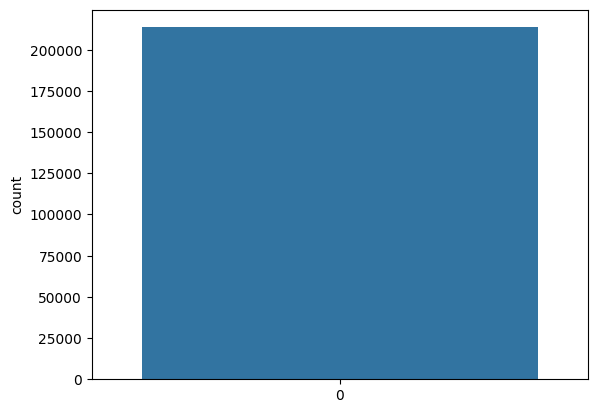

In [37]:
sns.countplot(y_train)

# Input Split

0 -- > Normal Tranaction

1 -- > Fradulent Tranaction

In [38]:
# separating the data for analysis
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [39]:
legit.shape

(284315, 31)

In [40]:
fraud.shape

(492, 31)

In [41]:
# statistics method of the data
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [42]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [43]:
# compare the values for both tranaction
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Under-Sampling
Build a sample dataset containing similar distribution of normal transactions and fradulent tranactions

Number of Fraudulent Tranaction --> 492

In [44]:
legit_sample = legit.sample(n=492)

# Concatenation two Dataframe

In [45]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)

In [46]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
148588,90067.0,1.822715,-0.192291,1.093753,4.272820,-0.581848,1.916697,-1.523022,0.487116,2.395939,...,-0.126883,0.344054,0.069828,-1.055905,-0.207895,0.108047,0.057523,-0.033974,13.71,0
197876,132220.0,-1.424878,1.797959,-0.731765,-1.026684,-0.267218,-1.183675,0.768201,0.514182,0.001425,...,-0.042513,-0.197442,-0.066629,-0.124411,-0.036346,-0.125909,-0.039955,0.125407,49.00,0
139379,83125.0,-1.469751,1.087475,1.487687,1.494455,-0.972889,1.299067,-0.807911,1.454095,0.269727,...,-0.264698,-0.552785,-0.028832,-0.326655,-0.046707,-0.371220,0.074155,0.013234,32.89,0
175021,122166.0,0.051560,0.868473,0.449396,-0.323897,0.476331,-1.027767,1.046472,-0.280023,-0.322305,...,-0.148840,-0.314747,0.090301,0.059298,-1.032848,0.134668,0.167004,0.215616,1.29,0
222967,143197.0,-1.182040,1.617537,-0.862526,-0.774497,0.792503,-0.308969,0.395912,0.870770,-0.998783,...,-0.159017,-0.882785,-0.345833,-0.023689,0.879766,0.480160,-0.531445,-0.200860,6.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [47]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
148588,90067.0,1.822715,-0.192291,1.093753,4.272820,-0.581848,1.916697,-1.523022,0.487116,2.395939,...,-0.126883,0.344054,0.069828,-1.055905,-0.207895,0.108047,0.057523,-0.033974,13.71,0
197876,132220.0,-1.424878,1.797959,-0.731765,-1.026684,-0.267218,-1.183675,0.768201,0.514182,0.001425,...,-0.042513,-0.197442,-0.066629,-0.124411,-0.036346,-0.125909,-0.039955,0.125407,49.00,0
139379,83125.0,-1.469751,1.087475,1.487687,1.494455,-0.972889,1.299067,-0.807911,1.454095,0.269727,...,-0.264698,-0.552785,-0.028832,-0.326655,-0.046707,-0.371220,0.074155,0.013234,32.89,0
175021,122166.0,0.051560,0.868473,0.449396,-0.323897,0.476331,-1.027767,1.046472,-0.280023,-0.322305,...,-0.148840,-0.314747,0.090301,0.059298,-1.032848,0.134668,0.167004,0.215616,1.29,0
222967,143197.0,-1.182040,1.617537,-0.862526,-0.774497,0.792503,-0.308969,0.395912,0.870770,-0.998783,...,-0.159017,-0.882785,-0.345833,-0.023689,0.879766,0.480160,-0.531445,-0.200860,6.90,0


In [48]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [49]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [50]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98177.573171,-0.001007,0.051147,-0.059993,0.005698,0.124709,-0.004006,-0.023843,-0.103157,-0.002836,...,0.030064,0.009803,-0.070288,0.007241,-0.002123,-0.047909,-0.032677,-0.013858,-0.005020,85.460203
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<Axes: xlabel='Class', ylabel='count'>

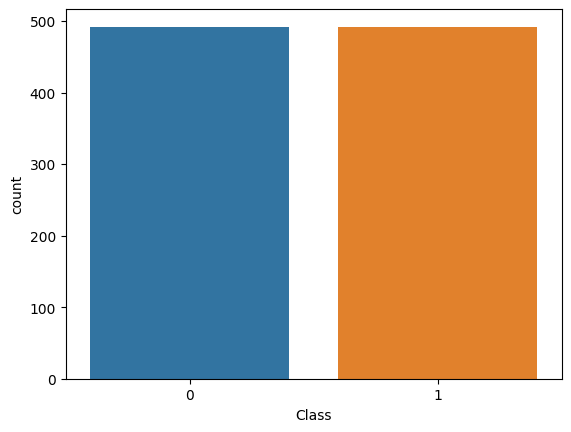

In [56]:
sns.countplot(x='Class',data=new_dataset)

In [59]:
x = new_dataset.drop(columns=['Class'],axis=1)
y = new_dataset['Class']

In [62]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_scaler = sc.fit_transform(x)

In [63]:
x_scaler

array([[ 0.01260629,  0.7621039 , -0.54136579, ..., -0.02009645,
        -0.1593071 , -0.37743631],
       [ 0.89121772,  0.17410437, -0.01053616, ..., -0.1141149 ,
         0.20709051, -0.22964586],
       [-0.13208853,  0.16597984, -0.2000331 , ..., -0.0040542 ,
        -0.05078093, -0.29711268],
       ...,
       [ 1.66515365,  0.30966813, -0.18966016, ...,  0.29586492,
         0.36560963, -0.10865786],
       [ 1.67797233, -0.13169252, -0.33382016, ...,  0.77790012,
        -0.66443345,  0.59117957],
       [ 1.68593451,  0.79274972, -0.44781106, ..., -0.07269648,
        -0.11639851, -0.25674147]])

In [65]:
x_scaler.shape

(984, 30)

In [66]:
x_scaler[-1]

array([ 1.68593451,  0.79274972, -0.44781106,  0.15540838, -0.5853801 ,
        0.62802271,  0.3407607 ,  0.51594713, -0.06175629,  0.80521046,
        0.433128  , -0.51181336,  0.83919521,  0.38965638,  0.32419589,
       -0.80844643,  0.73723979,  0.70730435,  0.95761369,  0.20117378,
       -0.20106451, -0.1863395 , -0.22726375, -0.04846819, -0.69063693,
        0.47081848, -0.61418849, -0.07269648, -0.11639851, -0.25674147])

In [67]:
# train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.25,random_state=42,stratify=y)

In [68]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# training
model.fit(x_train,y_train)

# testing
y_pred = model.predict(x_test)

cls = classification_report(y_test,y_pred)

f1Score = f1_score(y_test,y_pred)

print(cls)
print('F1 score:...',f1Score)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       123
           1       0.97      0.94      0.95       123

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246

F1 score:... 0.9547325102880659


In [69]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# training
model.fit(x_train,y_train)

# testing
y_pred = model.predict(x_test)

cls = classification_report(y_test,y_pred)

f1Score = f1_score(y_test,y_pred)

print(cls)
print('F1 score:...',f1Score)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       123
           1       0.99      0.93      0.96       123

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246

F1 score:... 0.9623430962343097


In [71]:
from xgboost import XGBClassifier

model = XGBClassifier(n_jobs = 1)

# training
model.fit(x_train,y_train)

# testing
y_pred = model.predict(x_test)

cls = classification_report(y_test,y_pred)

f1Score = f1_score(y_test,y_pred)

print(cls)
print('F1 score:...',f1Score)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       123
           1       0.99      0.92      0.95       123

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246

F1 score:... 0.9535864978902953
